In [2]:
import numpy as np
from scipy import stats 
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker

In [4]:
engine = create_engine("postgresql:///music", echo=True)
Session = sessionmaker(bind=engine)
session = Session()
con = engine.connect()

2019-05-07 15:42:19,108 INFO sqlalchemy.engine.base.Engine select version()
2019-05-07 15:42:19,109 INFO sqlalchemy.engine.base.Engine {}
2019-05-07 15:42:19,111 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-05-07 15:42:19,112 INFO sqlalchemy.engine.base.Engine {}
2019-05-07 15:42:19,113 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-05-07 15:42:19,114 INFO sqlalchemy.engine.base.Engine {}
2019-05-07 15:42:19,115 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-05-07 15:42:19,116 INFO sqlalchemy.engine.base.Engine {}
2019-05-07 15:42:19,117 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-05-07 15:42:19,118 INFO sqlalchemy.engine.base.Engine {}


In [5]:
query = """
    SELECT score
    FROM reviews
    JOIN labels
    USING(reviewid)
    WHERE label = 'self-released'
    """
result = con.execute(query).fetchall()
scores_self_released = np.array(result)

2019-05-07 15:42:19,124 INFO sqlalchemy.engine.base.Engine 
    SELECT score
    FROM reviews
    JOIN labels
    USING(reviewid)
    WHERE label = 'self-released'
    
2019-05-07 15:42:19,125 INFO sqlalchemy.engine.base.Engine {}


In [6]:
query = """
    SELECT score
    FROM reviews
"""
result = con.execute(query).fetchall()
scores_all_labels = np.array(result)

2019-05-07 15:42:19,143 INFO sqlalchemy.engine.base.Engine 
    SELECT score
    FROM reviews

2019-05-07 15:42:19,144 INFO sqlalchemy.engine.base.Engine {}


In [7]:
scores_self_released = np.array([score[0] for score in scores_self_released])
scores_all_labels = np.array([score[0] for score in scores_all_labels])

In [8]:
mu_pop = scores_all_labels.mean()
x_bar = scores_self_released.mean()
sigma = scores_self_released.std()
n = len(scores_self_released)

In [23]:
mu_pop

7.005779372587398

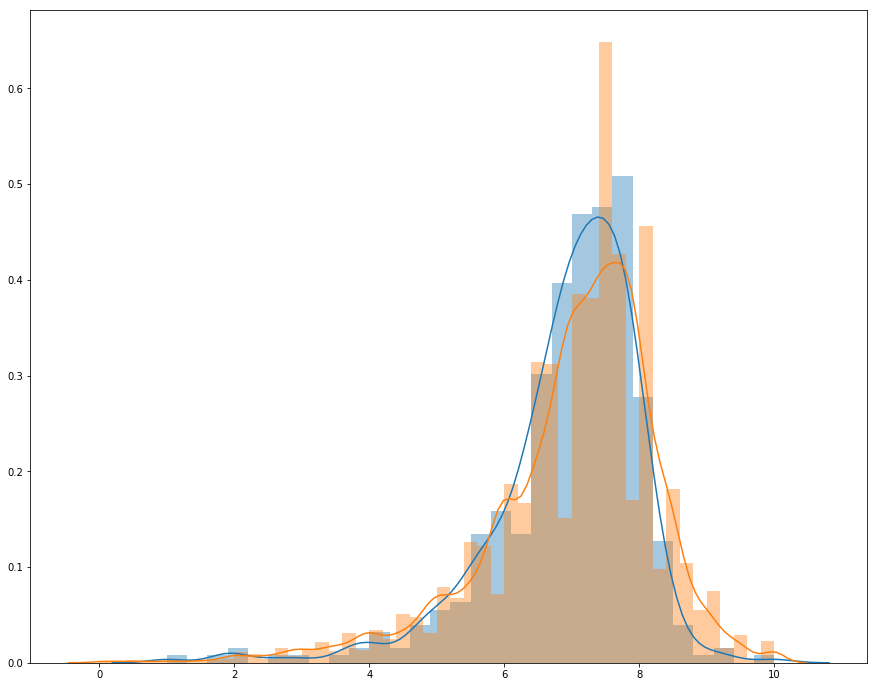

In [22]:
plt.figure(figsize=(15,12))
sns.distplot(scores_self_released)
sns.distplot(scores_all_labels)

In [18]:
t_val, p_val = stats.ttest_1samp(scores_self_released, mu_pop)
t_val, p_val

(-1.6196902904798227, 0.10605118857851459)

In [19]:
t_val = (x_bar - mu_pop) / ( sigma  / np.sqrt(n))

In [20]:
t_val

-1.6216219432717867

In [131]:
# Our alpha value for this one tail test is (fill in 0.025)
alpha = 0.025

In [132]:
t_crit = stats.t.ppf(0.025, n-1)
t_crit

-1.9656418415415793

In [135]:
p_val, alpha, p_val < alpha

(0.10605118857851459, 0.025, False)

In [137]:
t_val, t_crit, np.abs(t_val) > np.abs(t_crit)

(-1.6216219432717867, -1.9656418415415793, False)